Epoch 1/20
25/25 [==============================] - 1s 13ms/step - loss: 1858.6680 - val_loss: 475.2495
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 1338.9890 - val_loss: 338.5875
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 429.0664 - val_loss: 116.2325
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 22.4579 - val_loss: 55.2930
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: 12.6210 - val_loss: 66.8003
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 10.2742 - val_loss: 53.8591
Epoch 7/20
25/25 [==============================] - 0s 7ms/step - loss: 8.8099 - val_loss: 47.5991
Epoch 8/20
25/25 [==============================] - 0s 5ms/step - loss: 7.6315 - val_loss: 40.1480
Epoch 9/20
25/25 [==============================] - 0s 5ms/step - loss: 6.5824 - val_loss: 34.2910
Epoch 10/20
25/25 [==============================] - 0s 5ms/step - loss: 5.6559 - val_loss: 28

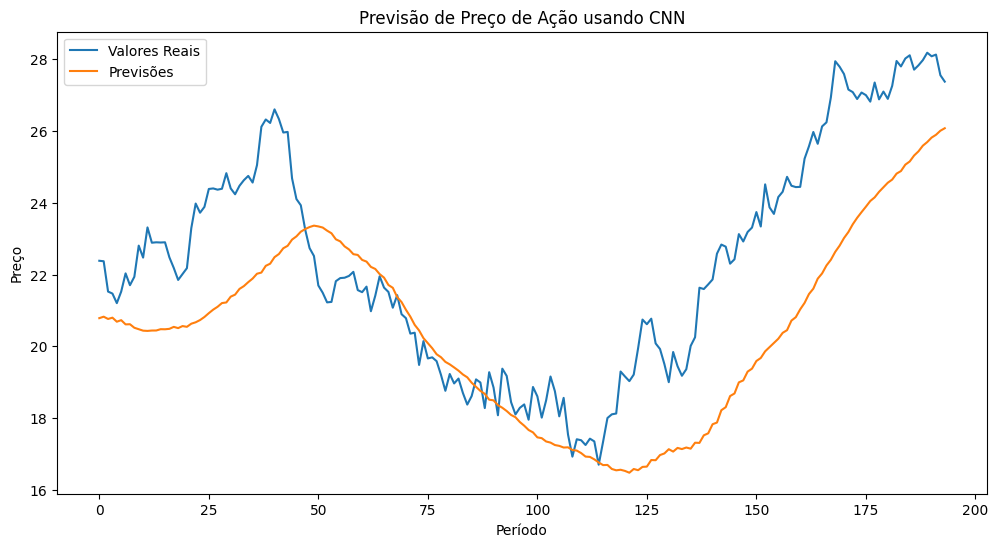

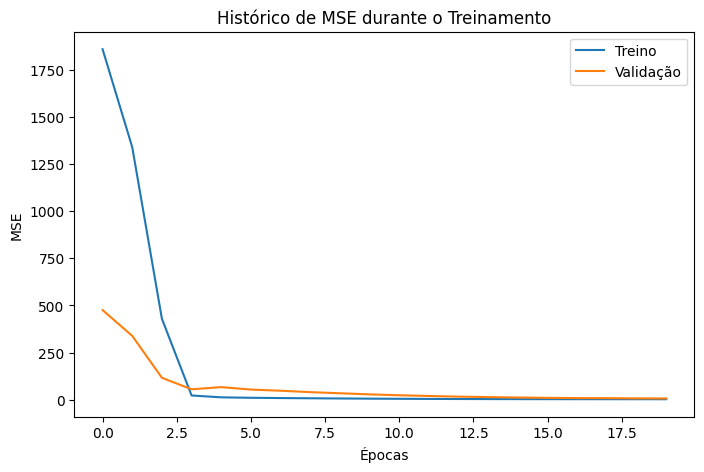

In [15]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Carregar dados financeiros (preços diários de uma ação)

# dados fictícios de preços de ação
np.random.seed(0)
num_samples = 1000
time = np.arange(num_samples)
prices = 50 + np.cumsum(0.5 * np.random.randn(num_samples))

# preparar dados para entrada na CNN
window_size = 30  # tamanho da janela
X = []
y = []
for i in range(len(prices) - window_size):
    X.append(prices[i:i + window_size])
    y.append(prices[i + window_size])
X = np.array(X).reshape(-1, window_size, 1)
y = np.array(y)

# treino e teste
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# normalização
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, window_size)).reshape(-1, window_size, 1)
X_test = scaler.transform(X_test.reshape(-1, window_size)).reshape(-1, window_size, 1)

# CNN
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(window_size, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)  # camada de saída para próxima previsão
])

# compilar
model.compile(optimizer='adam', loss='mse')

# treinar
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# avaliar
mse = model.evaluate(X_test, y_test)
print(f'Erro quadrático médio (MSE) no conjunto de teste: {mse}')

# plotar previsões vs valores reais
predictions = model.predict(X_test).flatten()
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valores Reais')
plt.plot(predictions, label='Previsões')
plt.xlabel('Período')
plt.ylabel('Preço')
plt.title('Previsão de Preço de Ação usando CNN')
plt.legend()
plt.show()

# plotar MSE
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Histórico de MSE durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()
